In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
df = pd.read_excel('heat_load.xlsx')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [47]:
df.shape

(768, 10)

In [48]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [49]:
df.duplicated().sum()

0

In [50]:
df1 = df.copy()

In [51]:
print(df.columns)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')


In [52]:
df=df.rename(columns={'X1':'Relative Compactness', 'X2':'Surface Area', 'X3':'Wall Area', 'X4':'Roof Area', 'X5':'Overall Height', 
                   'X6':'Orientation', 'X7':'Glazing Area', 'X8':'Glazing Area Distribution', 'Y1':'Heating Load', 'Y2':'Cooling Load'})

In [53]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [54]:
df.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

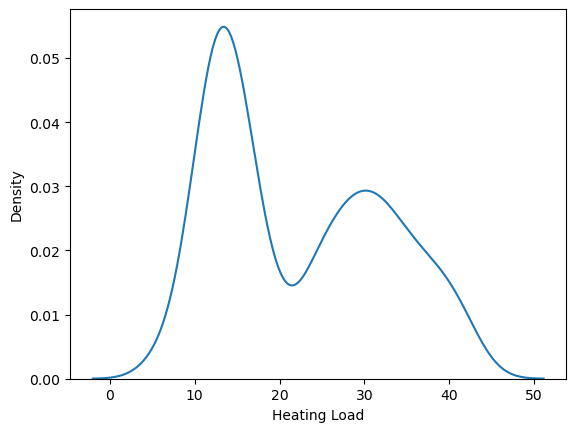

In [55]:
sns.kdeplot(df['Heating Load'])
plt.show()

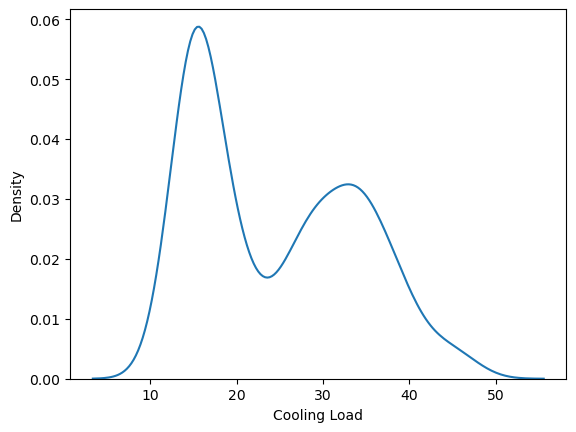

In [56]:
sns.kdeplot(df['Cooling Load'])
plt.show()

In [57]:
from scipy.stats import jarque_bera
test_stat1, p1 = jarque_bera((df['Heating Load']))
print('test_stat',test_stat1)
print('p',p1)

test_stat 66.18780831417149
p 4.24131022918316e-15


In [58]:
test_stat1, p1 = jarque_bera(np.log(df['Heating Load']))
print('test_stat',test_stat1)
print('p',p1)

test_stat 43.75786606308345
p 3.148474023257015e-10


In [59]:
from scipy.stats import boxcox
trs_hl, lam = boxcox(df['Heating Load'])    
print('lambda',lam)
print(type(trs_hl))
print(trs_hl.shape)

lambda 0.15693628229658507
<class 'numpy.ndarray'>
(768,)


In [60]:
# y = (x**lmbda - 1) / lmbda  if lmbda != 0
#     log(x)                  if lmbda == 0

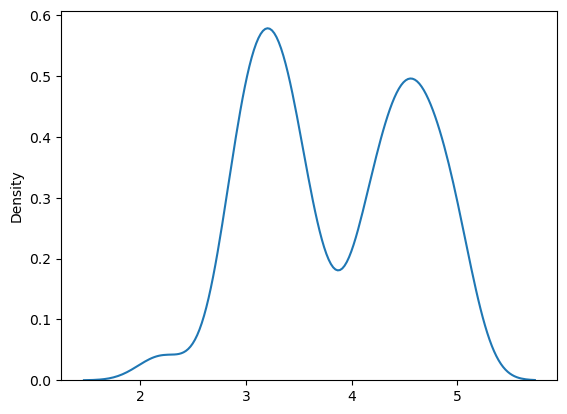

In [61]:
sns.kdeplot(trs_hl)
plt.show()

In [62]:
#inference:-
# Heating load and cooling load are not normalally distributed

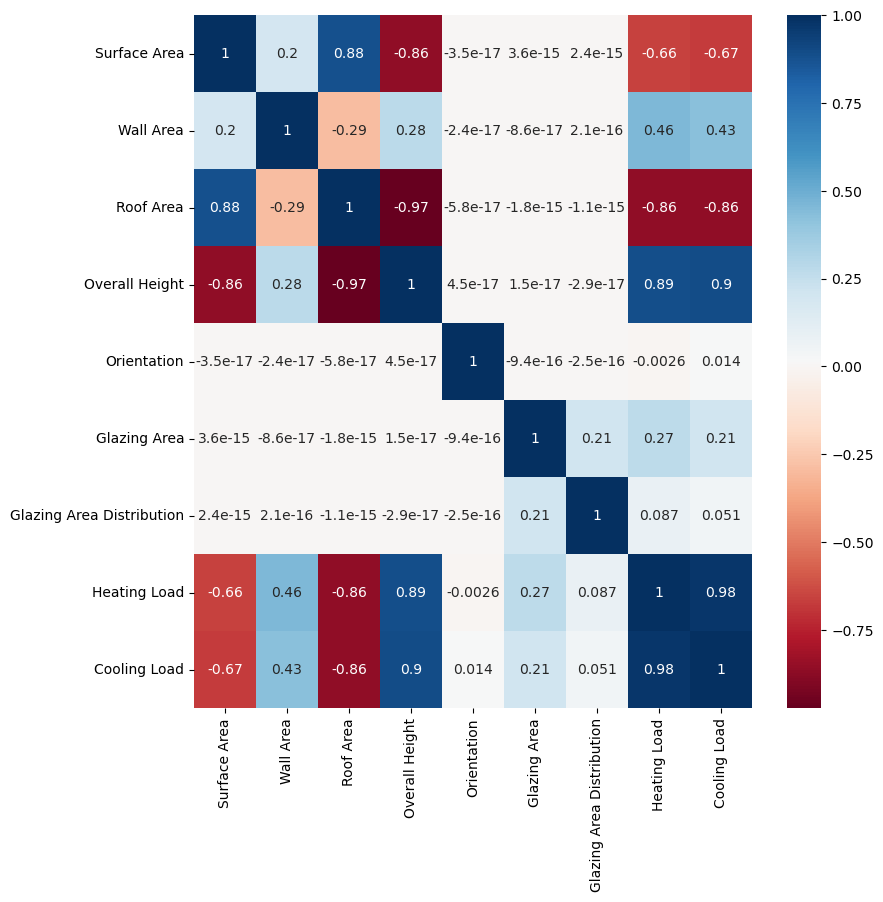

In [63]:
# correlation:
corr = df.iloc[:,1:].corr()

plt.figure(figsize=(9,9))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

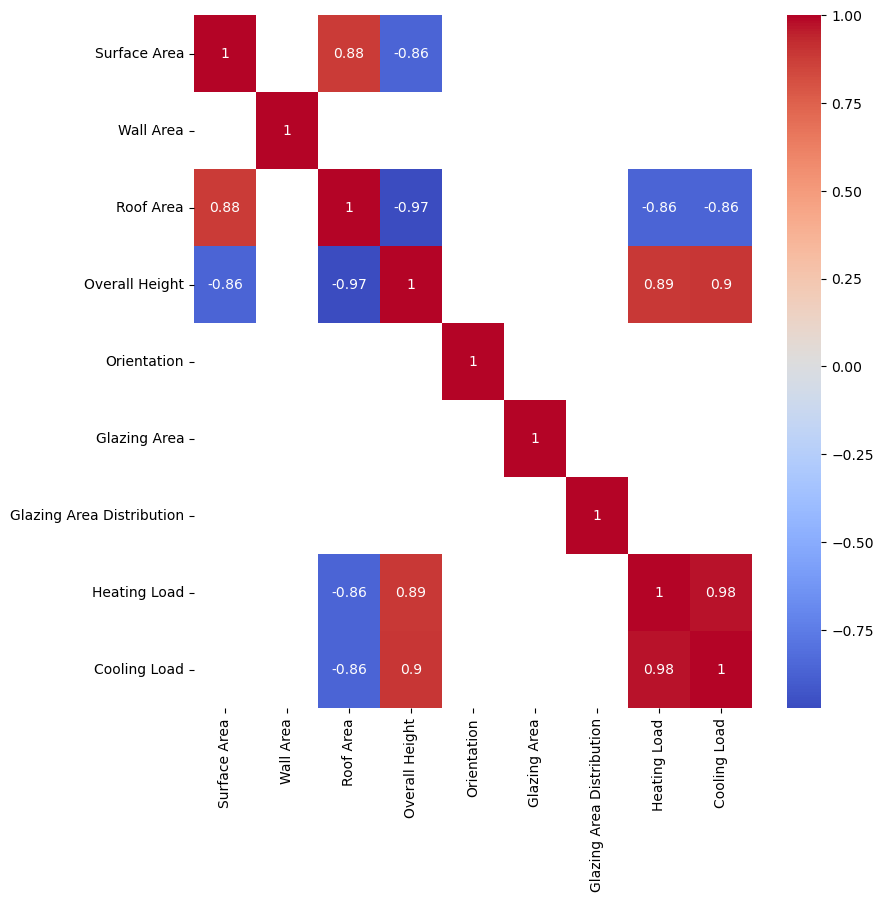

In [64]:
plt.figure(figsize=(9,9))
sns.heatmap(corr[abs(corr)>=0.7],annot=True,cmap='coolwarm')
plt.show()

In [65]:
#dropping highly correlated feaures
df.drop(['Roof Area'],axis=1,inplace=True)
df.shape

(768, 9)

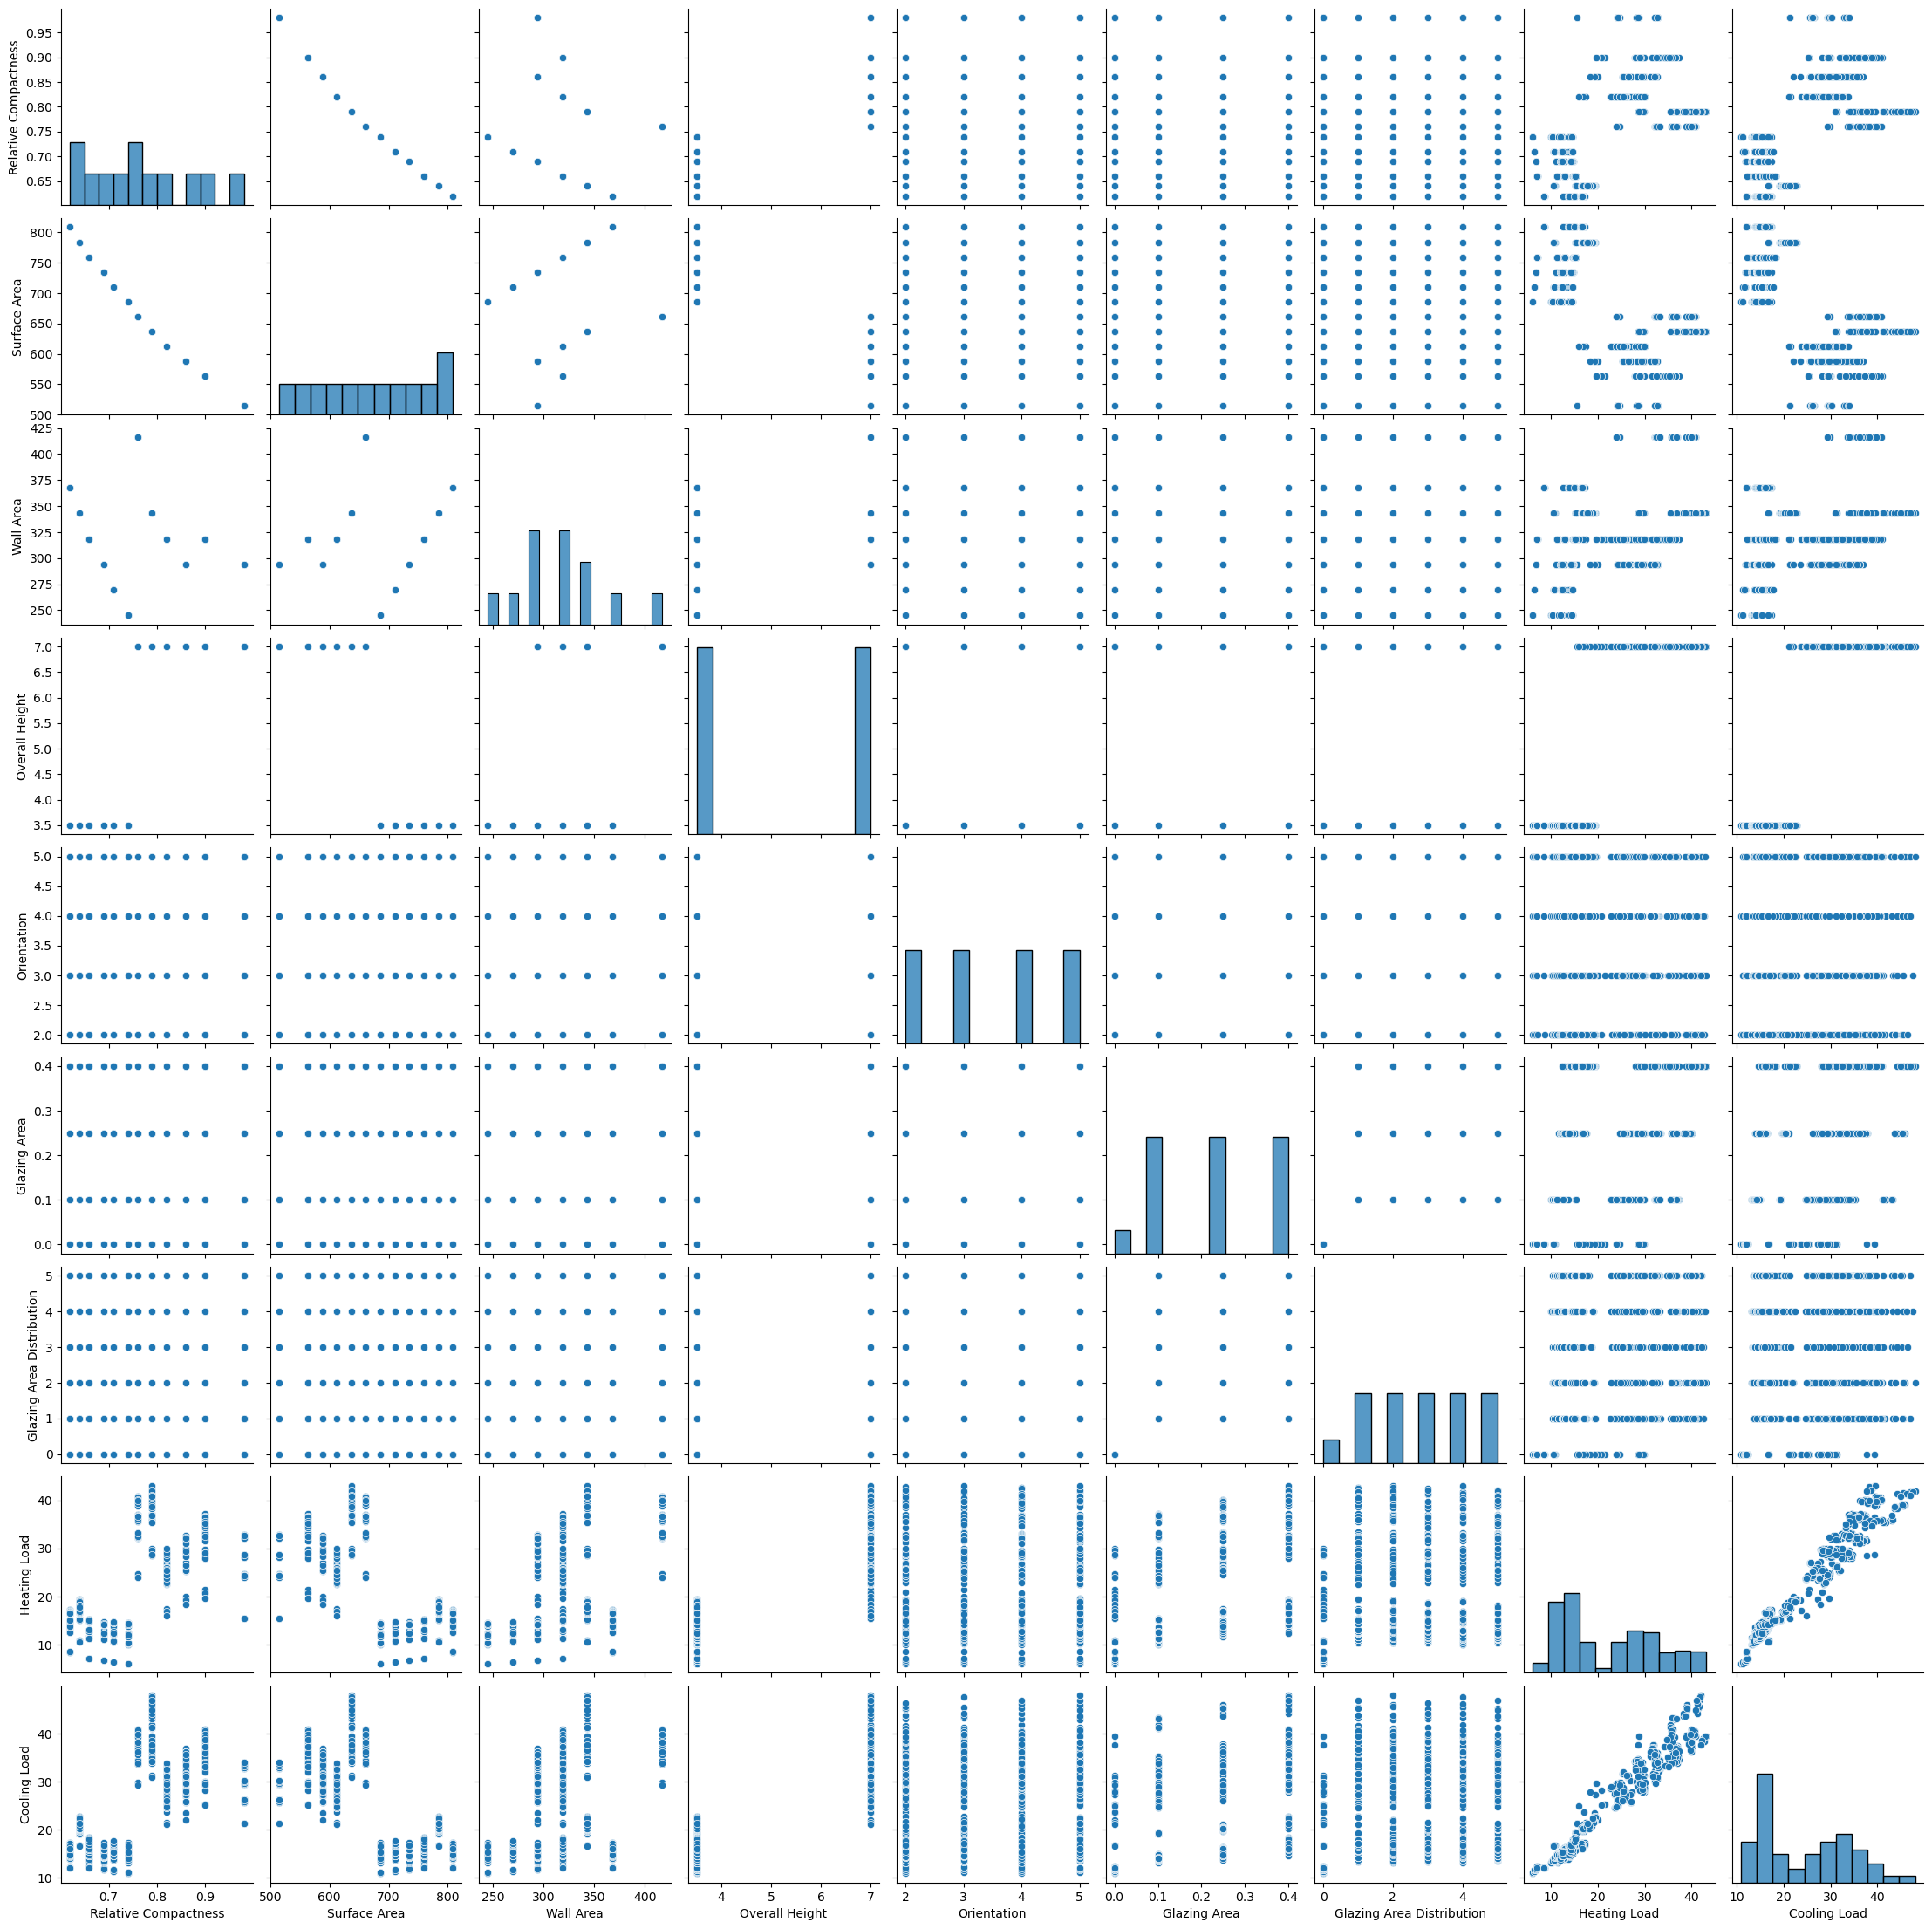

In [66]:
sns.pairplot(df)
plt.show()

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
x = df.iloc[:,:-2]
print(x.shape)
y = df.iloc[:,-2:]
print(y.shape)

(768, 6)
(768, 2)


In [69]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
# i=0,1,2
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
1,Surface Area,234.279574
2,Wall Area,225.064077
0,Relative Compactness,168.948751
3,Overall Height,134.035782
4,Orientation,10.796725
6,Glazing Area Distribution,4.496320
5,Glazing Area,4.293656


In [70]:
df.drop(['Surface Area'],axis=1,inplace=True)
df.shape

(768, 8)

In [71]:
df.columns

Index(['Relative Compactness', 'Wall Area', 'Overall Height', 'Orientation',
       'Glazing Area', 'Glazing Area Distribution', 'Heating Load',
       'Cooling Load'],
      dtype='object')

In [72]:
import statsmodels.api as sm

In [106]:
x1=x.copy()
y1=y.copy()
y1.head()
y2=y1.iloc[:,0:1]
y2.head()

,Heating Load
0,15.55
1,15.55
2,15.55
3,15.55
4,20.84


In [107]:
x1 = sm.add_constant(x1)
ols_m1 = sm.OLS(y2,x1).fit()
ols_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Heating Load   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     1336.
Date:                Tue, 03 Oct 2023   Prob (F-statistic):               0.00
Time:                        03:56:35   Log-Likelihood:                -1925.4
No. Observations:                 768   AIC:                             3865.
Df Residuals:                     761   BIC:                             3897.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                       -12.3262      2.710     -4.548      0.000     -17.647      -7.006
Relative Compactness        -14.5324      3.096     -4.693      0.000     -20.611      -8.454
Wall Area                     0.0350      0.004      7.969      0.000       0.026       0.044
Overall Height                5.6068      0.191     29.386      0.000       5.232       5.981
Orientation                  -0.0233      0.096     -0.242      0.809      -0.212       0.166
Glazing Area                 19.9327      0.827     24.093      0.000      18.309      21.557
Glazing Area Distribution     0.2038      0.071      2.868      0.004       0.064       0.343
==============================================================================
Omnibus:                       12.398   Durbin-Watson:                   0.596
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               20.364
Skew:                          -0.066   Prob(JB):                     3.78e-05
Kurtosis:                       3.787   Cond. No.                     1.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
df.drop(['Orientation'],axis=1,inplace=True)
df.shape

(768, 7)

In [112]:
x = df.iloc[:,:-2]
y = y2
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(768, 5)
(768, 1)


In [113]:
from sklearn.model_selection import train_test_split

In [114]:
x_train,x_test,y_train,y_test = train_test_split(x,y2,test_size=0.25,random_state=25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 5)
(192, 5)
(576, 1)
(192, 1)


In [115]:
from sklearn.linear_model import LinearRegression

In [116]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)

LinearRegression()

In [117]:
print('Train Score',lr1.score(x_train,y_train))
print('Test Score',lr1.score(x_test,y_test))

Train Score 0.9122784209097172
Test Score 0.91392636963108


In [118]:
from sklearn.ensemble import RandomForestRegressor

In [119]:
def eval_model(model,xtrain,xtest,ytrain,ytest,modelname):
    model.fit(xtrain,ytrain)
    print('Train Score',model.score(xtrain,ytrain))  # Train R2 Score
    print('Test Score',model.score(xtest,ytest))     # Test R2 Score
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    mae_train = mean_absolute_error(ytrain,ypred_train)
    mae_test = mean_absolute_error(ytest,ypred_test)
    mse_train = mean_squared_error(ytrain,ypred_train)
    mse_test = mean_squared_error(ytest,ypred_test)
    rmse_test = np.sqrt(mse_test)
    res = pd.DataFrame({'Train_MSE':mse_train,'Test_MSE':mse_test,
                        'RMSE':rmse_test,'Train_MAE':mae_train,'Test_MAE':mae_test
                       },
                       index=[modelname])
    return res

In [ ]:
# x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y2,test_size=0.25,random_state=25)
# print(x_train1.shape)
# print(x_test1.shape)
# print(y_train1.shape)
# print(y_test1.shape)

In [122]:
base_rf = RandomForestRegressor(random_state=0) 
from sklearn.metrics import mean_squared_error,mean_absolute_error# n_estimators=100
base_rf_res = eval_model(base_rf,x_train,x_test,y_train,y_test,'Base_RF')

Train Score 0.9988616016917783
Test Score 0.9976294230614917
